<a href="https://colab.research.google.com/github/skywalker0803r/ALK-/blob/main/ALK%E7%89%B9%E5%BE%B5%E9%81%B8%E5%8F%96_addxgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install --upgrade xlrd
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/ALK硫酸腐蝕預測/操作條件.xls",sheet_name='資料擷取')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,C-6301塔頂組成,Unnamed: 8,Unnamed: 9,...,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,S-6325
0,NaN,C-6301塔頂壓力,C-6301塔頂溫度,C-6301塔底溫度,C-6301塔頂回流,C-6301塔頂產品流量,C-6301塔底產品流量,NaN,NaN,NaN,...,V-6311→B-6301入口壓力,V-6311→B-6301入口溫度,V-6312→B-6301入口溫度,B-6301出口溫度,B-6301出口流量,B-6301出口壓力,V-6313回流V-6312流量,V-6312補充R-6301流量,V-6312補充R-6302流量,硫酸濃度
1,TIME,63PC001.MEAS,63TI043.PNT,63TI040.PNT,63FC004.MEAS,63FC003.MEAS,63FI101.PNT,S6301D-M_C2C4E-M%,S6301D-M_N_BUTANE-M%,S6301D-M_I_C4-M%,...,63PI056.PNT,63TI097A.PNT,63TI300A.PNT,63TI004A.PNT,63FI013W.PNT,63PC008.MEAS,63FC017A.MEAS,63FC015.MEAS,63FC016.MEAS,S6325D-TOTALACID-WT%
2,2010/01/01,6.1,57.3,66.3,60,108,22.7,10.3961,8.21355,39.4413,...,0.1,4,12.6,62.4,164.2,4.7,NaN,110.5,110.5,91.15
3,2010/01/02,6.1,57.2,66.3,60,108,22.8,11.1381,8.57479,37.8781,...,0.1,4,12.8,62.6,162.6,4.7,NaN,109.3,109.3,91.6
4,2010/01/03,6.1,57.1,66.4,60,108,22.2,10.2551,8.32087,40.6469,...,0.1,3.9,12.7,62.6,160.6,4.7,NaN,108.4,108.4,91.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,2021/11/14,5,47.2,61.1,25,112,3.3,11.6894,10.3815,41.1423,...,0.1,7.2,15.9,65.8,153.5,4.9,279.4,119.5,110.3,92.6
4338,2021/11/15,5,47.1,61,25,112,3.6,11.6968,10.4777,41.255,...,0.1,7.3,16,65.9,153.1,4.9,278,117.9,108.8,92.37
4339,2021/11/16,5,47.1,60.9,25,112.9,3.7,11.4967,10.5913,41.7672,...,0.1,7.2,16.4,65.7,154.4,4.9,281,117.9,108.8,92.55
4340,2021/11/17,5,47,60.9,25,113.9,4,11.5928,10.7457,41.3603,...,0.1,6.9,16.7,65.4,155.5,4.9,283.9,118.6,109.5,92.5


In [3]:
c = df.iloc[1,1:].values
v = df.iloc[2:,1:].values
d = pd.DataFrame(v,columns=c)
d = d.dropna(axis=1,how='all')
d = d.dropna(axis=0,how='all')
d = d.fillna(method='ffill')
d = d.fillna(method='bfill')
d

,63PC001.MEAS,63TI043.PNT,63TI040.PNT,63FC004.MEAS,63FC003.MEAS,63FI101.PNT,S6301D-M_C2C4E-M%,S6301D-M_N_BUTANE-M%,S6301D-M_I_C4-M%,S6301D-M_I_BUTENE-M%,...,63PI056.PNT,63TI097A.PNT,63TI300A.PNT,63TI004A.PNT,63FI013W.PNT,63PC008.MEAS,63FC017A.MEAS,63FC015.MEAS,63FC016.MEAS,S6325D-TOTALACID-WT%
0,6.1,57.3,66.3,60.0,108.0,22.7,10.39610,8.21355,39.4413,7.801000,...,0.1,4.0,12.6,62.4,164.2,4.7,231.4,110.5,110.5,91.15
1,6.1,57.2,66.3,60.0,108.0,22.8,11.13810,8.57479,37.8781,7.953000,...,0.1,4.0,12.8,62.6,162.6,4.7,231.4,109.3,109.3,91.60
2,6.1,57.1,66.4,60.0,108.0,22.2,10.25510,8.32087,40.6469,7.765000,...,0.1,3.9,12.7,62.6,160.6,4.7,231.4,108.4,108.4,91.19
3,6.1,57.0,66.4,60.0,108.0,22.1,10.68940,8.60413,39.1715,7.904000,...,0.1,4.0,12.8,62.8,159.5,4.7,231.4,108.2,108.2,91.14
4,6.1,56.9,66.5,60.0,109.8,22.1,9.58062,8.11639,43.4791,7.517000,...,0.1,3.8,12.7,62.7,158.1,4.7,231.4,107.0,107.0,91.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,5.0,47.2,61.1,25.0,112.0,3.3,11.68940,10.38150,41.1423,0.463594,...,0.1,7.2,15.9,65.8,153.5,4.9,279.4,119.5,110.3,92.60
4336,5.0,47.1,61.0,25.0,112.0,3.6,11.69680,10.47770,41.2550,0.672790,...,0.1,7.3,16.0,65.9,153.1,4.9,278.0,117.9,108.8,92.37
4337,5.0,47.1,60.9,25.0,112.9,3.7,11.49670,10.59130,41.7672,0.510040,...,0.1,7.2,16.4,65.7,154.4,4.9,281.0,117.9,108.8,92.55
4338,5.0,47.0,60.9,25.0,113.9,4.0,11.59280,10.74570,41.3603,0.652470,...,0.1,6.9,16.7,65.4,155.5,4.9,283.9,118.6,109.5,92.50


In [4]:
import requests
url = 'https://gist.githubusercontent.com/skywalker0803r/98384fe734d607b39438f3e2192c8276/raw/47a4aed4e8b62ec217c183c1c9891fa5e6f73dc9/feature_select_armory.py'
exec(requests.get(url).text)

In [5]:
x_col = d.columns[:-1].values.tolist()
y_col = d.columns[-1]
result,lasso_model = lasso_find_coef(d,x_col,y_col)

In [6]:
print('LASSO係數')
result.abs().T.sort_values(by='coef',ascending=False).head(10)

LASSO係數


,coef
63TI004A.PNT,0.036053
63TI043.PNT,0.020762
S6324D-L_C2C4E-M%,0.018581
63LI028S.PNT,0.013636
63LI026S.PNT,0.010363
63LI017.PNT,0.010316
63FI013W.PNT,0.008733
63FC017A.MEAS,0.002945
63LI015S.PNT,0.002220
63II018A.PNT,0.000000


In [7]:
key_features = result.abs().T.sort_values(by='coef',ascending=False).head(10).index.tolist()
print('皮爾森係數')
d[key_features+[y_col]].corr().abs()[['S6325D-TOTALACID-WT%']].sort_values(by='S6325D-TOTALACID-WT%',ascending=False).iloc[1:]

皮爾森係數


,S6325D-TOTALACID-WT%
63LI026S.PNT,0.280534
S6324D-L_C2C4E-M%,0.264634
63LI028S.PNT,0.214670
63TI043.PNT,0.202341
63TI004A.PNT,0.180295
63FC017A.MEAS,0.156893
63LI017.PNT,0.128034
63FI013W.PNT,0.113975
63II018A.PNT,0.106459
63LI015S.PNT,0.058751


In [8]:
y_pred = lasso_model.predict(d[x_col])
y_real = d[y_col].values
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def mape(actual, pred): 
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100
print('LASSO建模結果')
print('R2:',r2_score(y_real,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_real,y_pred)))
print('MAPE:',mape(y_real,y_pred))

LASSO建模結果
R2: 0.36008917757216363
RMSE: 1.0730229254641104
MAPE: 0.8888353587588034


In [18]:
import xgboost
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def mape(actual, pred): 
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100
xgbmodel = xgboost.XGBRegressor()
xgbmodel.fit(d[x_col].values,d[y_col].values)
y_pred = xgbmodel.predict(d[x_col].values)
y_real = d[y_col].values
print('r2',xgbmodel.score(d[x_col].values,d[y_col].values))
print('mape',mape(y_pred,y_real))


[07:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 0.7612059234464658
mape 0.5277612319925298


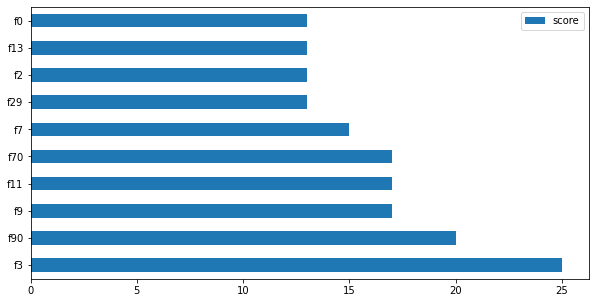

In [36]:
feature_important = xgbmodel.get_booster().get_score(importance_type='weight')
feature_important = dict(sorted(feature_important.items(), key=lambda x:x[1],reverse=True))
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score",ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (10,5)) ## plot top 40 features

In [44]:
dict(zip(
    x_col,
    xgbmodel.get_booster().get_score(importance_type='weight').keys()))

{'*(BK-BL)': 'f69',
 '63FC003.MEAS': 'f87',
 '63FC004.MEAS': 'f27',
 '63FC008.MEAS': 'f11',
 '63FC011A.MEAS': 'f18',
 '63FC015.MEAS': 'f73',
 '63FC016.MEAS': 'f77',
 '63FC040.MEAS': 'f89',
 '63FC060.MEAS': 'f36',
 '63FI011.PNT': 'f72',
 '63FI021A.PNT': 'f84',
 '63FI022A.PNT': 'f86',
 '63FI023A.PNT': 'f83',
 '63FI024A.PNT': 'f22',
 '63FI025A.PNT': 'f12',
 '63FI026A.PNT': 'f3',
 '63FI027A.PNT': 'f62',
 '63FI028A.PNT': 'f21',
 '63FI029A.PNT': 'f16',
 '63FI030A.PNT': 'f100',
 '63FI044A.PNT': 'f91',
 '63FI045A.PNT': 'f41',
 '63FI046A.PNT': 'f104',
 '63FI047A.PNT': 'f42',
 '63FI101.PNT': 'f79',
 '63II001A.PNT': 'f2',
 '63II002A.PNT': 'f34',
 '63II003A.PNT': 'f66',
 '63II004A.PNT': 'f53',
 '63II005A.PNT': 'f43',
 '63II006A.PNT': 'f5',
 '63II007A.PNT': 'f70',
 '63II008A.PNT': 'f20',
 '63II009A.PNT': 'f46',
 '63II010A.PNT': 'f39',
 '63II011A.PNT': 'f95',
 '63II012A.PNT': 'f24',
 '63II013A.PNT': 'f45',
 '63II014A.PNT': 'f37',
 '63II015A.PNT': 'f49',
 '63II016A.PNT': 'f26',
 '63II017A.PNT': 'f99'

In [45]:
xgbmodel.get_booster().get_score(importance_type='weight')

{'f0': 13,
 'f1': 11,
 'f10': 7,
 'f100': 1,
 'f102': 1,
 'f104': 1,
 'f105': 1,
 'f11': 17,
 'f112': 10,
 'f113': 4,
 'f114': 11,
 'f115': 7,
 'f116': 2,
 'f12': 10,
 'f13': 13,
 'f14': 11,
 'f15': 9,
 'f16': 2,
 'f17': 1,
 'f18': 6,
 'f2': 13,
 'f20': 10,
 'f21': 3,
 'f22': 1,
 'f24': 3,
 'f26': 4,
 'f27': 3,
 'f29': 13,
 'f3': 25,
 'f30': 1,
 'f32': 3,
 'f34': 3,
 'f35': 1,
 'f36': 5,
 'f37': 3,
 'f39': 2,
 'f4': 3,
 'f40': 2,
 'f41': 2,
 'f42': 2,
 'f43': 10,
 'f45': 3,
 'f46': 10,
 'f47': 4,
 'f48': 2,
 'f49': 3,
 'f5': 10,
 'f50': 3,
 'f51': 3,
 'f52': 2,
 'f53': 10,
 'f57': 1,
 'f58': 4,
 'f6': 3,
 'f61': 2,
 'f62': 2,
 'f66': 10,
 'f67': 1,
 'f69': 12,
 'f7': 15,
 'f70': 17,
 'f71': 5,
 'f72': 7,
 'f73': 7,
 'f74': 5,
 'f75': 7,
 'f76': 4,
 'f77': 3,
 'f78': 1,
 'f79': 10,
 'f8': 3,
 'f82': 7,
 'f83': 2,
 'f84': 1,
 'f85': 3,
 'f86': 1,
 'f87': 10,
 'f88': 2,
 'f89': 4,
 'f9': 17,
 'f90': 20,
 'f91': 1,
 'f92': 7,
 'f93': 2,
 'f94': 5,
 'f95': 1,
 'f96': 1,
 'f97': 1,
 'f98': 2